In [ ]:
# Import libraries
from google.colab import files
from zipfile import ZipFile
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload zip file
uploaded = files.upload()


In [ ]:
# Specify zip file name
file_name = "Leaf(1).zip"

# Extract dataset
with ZipFile(file_name, 'r') as zip:
    zip.printdir() # Print all files in the zip file
    print('Extracting all files...')
    zip.extractall("LeafDataset") # Extracts all files into a new folder
    print('Dataset extracted successfully!')

Streaming output truncated to the last 5000 lines.
PlantVillage/val/Soybean___healthy/5344b09f-bbbe-4a2c-9345-d93dd4e69eb4___RS_HL 4693.JPG 2021-08-20 01:13:34        12606
PlantVillage/val/Soybean___healthy/5361ba4a-351e-466c-99c5-8845f35c00df___RS_HL 2890.JPG 2021-08-20 01:13:34        14134
PlantVillage/val/Soybean___healthy/537e5409-d824-4859-967f-3c502f13deec___RS_HL 5474.JPG 2021-08-20 01:13:34        16578
PlantVillage/val/Soybean___healthy/538969da-545b-4bce-bc1d-0932898dc5e6___RS_HL 5230.JPG 2021-08-20 01:13:34        17655
PlantVillage/val/Soybean___healthy/538ccfe2-1509-40d7-beae-ae7cf84e1e5d___RS_HL 3717.JPG 2021-08-20 01:13:34        16517
PlantVillage/val/Soybean___healthy/5397bf6a-aeeb-4f1c-b554-bdb604bb23c3___RS_HL 6508.JPG 2021-08-20 01:13:34        26304
PlantVillage/val/Soybean___healthy/53dc0466-621c-43e1-9c5e-e340f3d50171___RS_HL 6381.JPG 2021-08-20 01:13:34        22157
PlantVillage/val/Soybean___healthy/53e3fcc2-3234-4330-b551-083c72fb6e12___RS_HL 6982.JPG 2021-0

In [ ]:
import os

# Define dataset directories
train_path = "LeafDataset/PlantVillage/train"
test_path = "LeafDataset/PlantVillage/test"

# Data Cleaning
def clean_dataset(dataset_path):
    total_images = 0
    corrupted_images = 0

    print(f"\nChecking dataset: {dataset_path}")
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue

        print(f"\nChecking folder: {class_name}")
        image_count = 0

        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)

            # Try reading the image
            img = cv2.imread(file_path)
            if img is None:
                print(f" Corrupted image removed: {file_path}")
                os.remove(file_path)
                corrupted_images += 1
                continue

            image_count += 1
            total_images += 1

        print(f" {image_count} valid images in '{class_name}'")

    print("\n--- Summary ---")
    print(f"Total valid images: {total_images}")
    print(f"Total corrupted images removed: {corrupted_images}")

# Run cleaning on both datasets
clean_dataset(train_path)
clean_dataset(test_path)


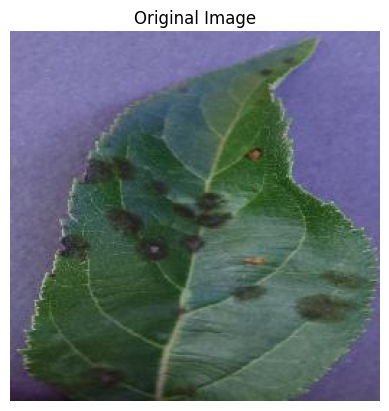

In [ ]:
# Image Acquisition
# Choose one sample image
sample_image_path = "LeafDataset/PlantVillage/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG"

# Read image
img = cv2.imread(sample_image_path)

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

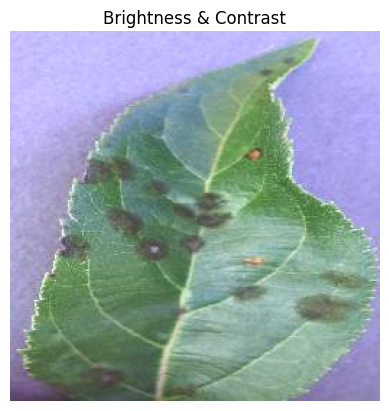

In [ ]:
# Image Enhancement
# Adjust the brightness and contrast
alpha = 1.3
beta = 30
img_bright = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

#Plot the brightness & contrast image
plt.title("Brightness & Contrast")
plt.imshow(img_bright)
plt.axis("off")
plt.show()

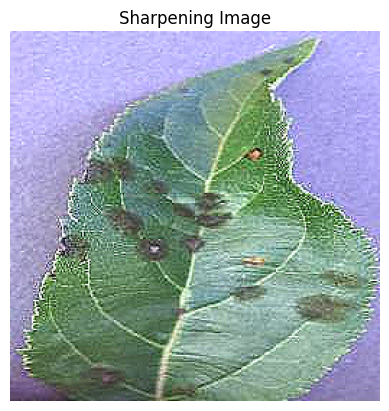

In [ ]:
# Adjust sharpening image
# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(img_bright, -1, kernel)

#Plot the sharpened image
plt.title("Sharpening Image")
plt.imshow(sharpened_image)
plt.axis("off")
plt.show()

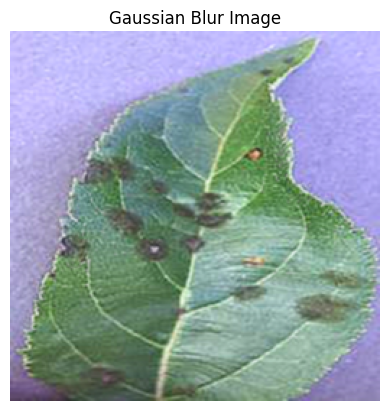

In [ ]:
# Remove noise using a Gaussian filter
filtered_image = cv2.GaussianBlur(sharpened_image, (3, 3), 0)

#Plot the blured image
plt.title("Gaussian Blur Image")
plt.imshow(filtered_image)
plt.axis("off")
plt.show()

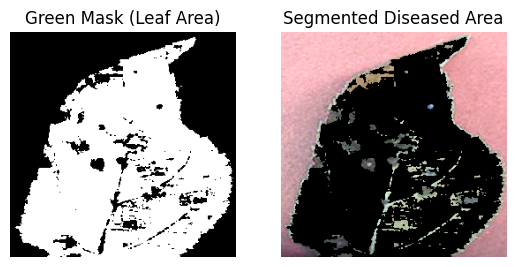

In [ ]:
# Image Segmentation
# Convert to HSV color
hsv = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2HSV)

# Define green color range for leaf detection
lower_green = np.array([20, 40, 40])
upper_green = np.array([100, 255, 255])

# Mask green parts (healthy leaf)
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invert mask to highlight diseased parts
mask_inv = cv2.bitwise_not(mask)

# Apply mask to image
segmented = cv2.bitwise_and(filtered_image, filtered_image, mask=mask_inv)

plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title("Green Mask (Leaf Area)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title("Segmented Diseased Area")
plt.axis("off")
plt.show()

In [ ]:
# Image Resize to standard size 256
img_resized = cv2.resize(segmented, (256, 256))

# Normalize pixel values (0–1)
img_normalized = img_resized / 255.0

# Display preprocessing results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_resized)
plt.title("Resized Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_normalized)
plt.title("Normalized Image")
plt.axis('off')

plt.show()
